In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,max_salary,average_salary,company_text,job_state,age,python_yn,RStudio_yn,spark,aws,excel
0,Data Scientist,$106K-$135K (Glassdoor Est.),"About Netskope\r\n\r\nToday, there's more data...",Netskope\r\n4.2,"San Francisco, CA","Santa Clara, CA",501 to 1000 employees,2012,Company - Private,Enterprise Software & Network Solutions,...,135,120.5,Netskope\r\n,CA,8,1,0,1,0,1
1,Data Scientist,$106K-$135K (Glassdoor Est.),Position Summary\r\n\r\nWe provide our utility...,Franklin Energy\r\n3.5,"San Francisco, CA","Port Washington, WI",1001 to 5000 employees,1994,Company - Private,Energy,...,135,120.5,Franklin Energy\r\n,CA,26,1,0,0,1,0
2,"Data Scientist, Medidata - Core",$106K-$135K (Glassdoor Est.),Medidata is leading the digital transformation...,Medidata Solutions\r\n4.3,"San Francisco, CA","New York, NY",1001 to 5000 employees,1999,Company - Public,Enterprise Software & Network Solutions,...,135,120.5,Medidata Solutions\r\n,CA,21,1,0,0,1,0
3,Data Scientist/Machine Learning,$106K-$135K (Glassdoor Est.),"Data Scientist/Machine Learning\r\n\r\nMist, a...",Juniper Networks\r\n3.8,"Cupertino, CA","Sunnyvale, CA",5001 to 10000 employees,1996,Company - Public,Telecommunications Services,...,135,120.5,Juniper Networks\r\n,CA,24,1,0,1,1,1
4,Data Scientist (Data Analytics Specialist),$106K-$135K (Glassdoor Est.),The Position\r\n\r\n\r\nAs a Data Analytics Sp...,Genentech\r\n4.0,"South San Francisco, CA","South San Francisco, CA",10000+ employees,1976,Subsidiary or Business Segment,Biotech & Pharmaceuticals,...,135,120.5,Genentech\r\n,CA,44,0,0,0,0,1


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_text', 'job_state', 'age', 'python_yn', 'RStudio_yn', 'spark',
       'aws', 'excel'],
      dtype='object')

In [8]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sir' in title.lower() or 'lead' in title.lower() or 'prinicipal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or'jr.' in title.lower():
        return  'jr'
    else:
        return 'na'


In [9]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [10]:
df.job_simp.value_counts()

data scientist    1000
Name: job_simp, dtype: int64

In [11]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        656
senior    344
Name: seniority, dtype: int64

In [12]:
#job description lenght
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      4244
1      3773
2      4937
3      2429
4      5023
       ... 
995    4452
996    3449
997    2486
998    3425
999    4387
Name: desc_len, Length: 1000, dtype: int64

In [13]:
#competitors count
#df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['Competitors']

0              Skyhigh Networks, Zscaler, NortonLifeLock
1                                                     -1
2                                                 Oracle
3                                                     -1
4                                                     -1
                             ...                        
995                                                   -1
996                                                   -1
997           TEKsystems, Kforce, Milestone Technologies
998                                Square, Amazon, Apple
999    CoreLogic, HouseCanary, Pro Teck Valuation Int...
Name: Competitors, Length: 1000, dtype: object

In [15]:
#hourly wage to annual
df['min_salary']= df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary,axis=1)

In [16]:
#df[df.hourly ==0][['hourly','min_salary','max_salary']]

In [17]:
df['company_text'] = df.company_text.apply(lambda x: x.replace('\n',''))
df['company_text'] = df.company_text.apply(lambda x: x.replace('\r',''))

In [18]:
df['company_text']

0                Netskope
1         Franklin Energy
2      Medidata Solutions
3        Juniper Networks
4               Genentech
              ...        
995                   CDK
996              Blue Owl
997                 Ursus
998                PayPal
999         Clear Capital
Name: company_text, Length: 1000, dtype: object

In [19]:
df.describe()


,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,age,python_yn,RStudio_yn,spark,aws,excel,desc_len
count,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,1417.128000,0.0,0.0,129.880000,202.570000,166.225000,18.514000,0.827000,0.0,0.201000,0.283000,0.344000,3522.971000
std,904.914725,0.0,0.0,18.557208,31.117413,24.474392,27.591141,0.378437,0.0,0.400949,0.450682,0.475279,1152.143864
min,-1.000000,0.0,0.0,95.000000,135.000000,120.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,132.000000
25%,-1.000000,0.0,0.0,130.000000,205.000000,167.500000,-1.000000,1.000000,0.0,0.000000,0.000000,0.000000,2951.250000
50%,1998.000000,0.0,0.0,130.000000,205.000000,167.500000,9.000000,1.000000,0.0,0.000000,0.000000,0.000000,3449.000000
75%,2006.000000,0.0,0.0,130.000000,205.000000,167.500000,22.000000,1.000000,0.0,0.000000,1.000000,1.000000,4387.000000
max,2019.000000,0.0,0.0,212.000000,331.000000,271.500000,338.000000,1.000000,0.0,1.000000,1.000000,1.000000,12034.000000


In [20]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_text', 'job_state', 'age', 'python_yn', 'RStudio_yn', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

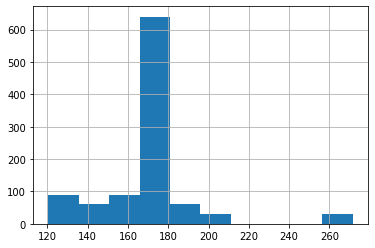

In [21]:
df.average_salary.hist()

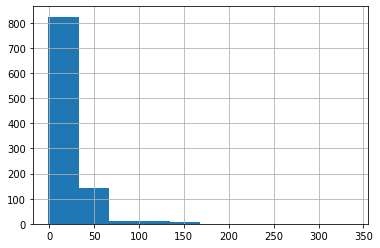

In [22]:
df.age.hist()

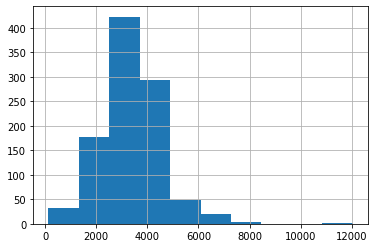

In [23]:
df.desc_len.hist()

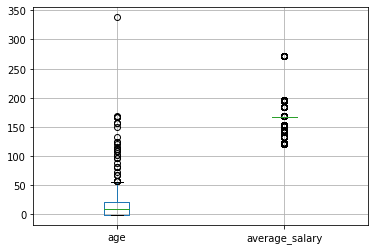

In [24]:
df.boxplot(column = ['age', 'average_salary'])

In [25]:
df[['age', 'average_salary','desc_len']].corr()

,age,average_salary,desc_len
age,1.000000,0.002622,0.132123
average_salary,0.002622,1.000000,-0.059962
desc_len,0.132123,-0.059962,1.000000


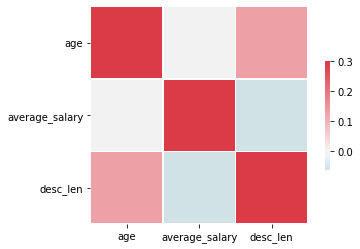

In [26]:
cmap= sns.diverging_palette(220,10,as_cmap= True)
sns.heatmap(df[['age','average_salary','desc_len']].corr(),vmax=.3,center=0,cmap=cmap,
           square=True, linewidth=.5,cbar_kws={"shrink": .5})

In [27]:
df_cat=df[[ 'Job Description', 'Company Name', 'python_yn', 'RStudio_yn', 'spark',
       'aws', 'excel',]]

In [28]:
#for i in df_cat.columns:
    #cat_num=df_cat[i].value_counts()
   # print("graph for %s: total = %d" % (i,len(cat_num)))
  #  chart = sns.barplot(x = cat_num.index, y=cat_num)
 #   chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
#    plt.show() 

In [29]:
#for i in df_cat[['Location ','Headquarters','compnay_text']].columns:
 #   cat_num=df_cat[i].value_counts()[:20]
  #  print("graph for %s: total = %d" % (i,len(cat_num)))
   # chart = sns.barplot(x = cat_num.index, y=cat_num)
    #chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    #plt.show()

In [34]:
pd.pivot_table(df, index=['job_simp'], values='average_salary')

,average_salary
job_simp,
data scientist,166.225


In [37]:
#pd.pivot_table(df, index='job_state', values='average_salary').sort_values('average_salary', ascending = False)

In [39]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [41]:
#pd.pivot_table(df, index=['job_state','job_simp'],values ='average_salary').sort_values('job_state',ascending= False)

In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'average_salary',
       'company_text', 'job_state', 'age', 'python_yn', 'RStudio_yn', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [45]:
#Industry,sector,revenue,hourly,employer_provided,python_yn,RStudio_yn,spark,aws,excel,desc_len

In [63]:
df_pivots = df[['Industry','Sector','Revenue','hourly','employer_provided','average_salary','python_yn','RStudio_yn','spark','aws','excel','desc_len']]

In [69]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index =i, values= 'average_salary'))

Industry
                                         average_salary
Industry                                               
-1                                           168.730303
Accounting                                   168.500000
Advertising & Marketing                      191.600000
Aerospace & Defence                          150.666667
Banks & Building Societies                   271.500000
Biotech & Pharmaceuticals                    187.294118
Colleges & Universities                      126.500000
Computer Hardware & Software                 157.712963
Consulting                                   134.250000
Consumer Electronics & Appliance Shops       152.000000
Department, Clothing, & Shoe Shops           178.333333
Education Training Services                  149.250000
Electrical & Electronic Manufacturing        188.375000
Energy                                       161.333333
Enterprise Software & Network Solutions      161.068182
Express Delivery Services              

ValueError: Grouper for 'average_salary' not 1-dimensional

In [72]:
pd.pivot_table(df_pivots, index ='Revenue', columns = 'python_yn', values ='average_salary',aggfunc='count')

python_yn,0,1
Revenue,,
-1,8.0,21.0
Unknown / Non-Applicable,26.0,415.0
₹1 to ₹5 billion (INR),6.0,24.0
₹10 to ₹50 billion (INR),102.0,16.0
₹10 to ₹50 million (INR),1.0,11.0
₹100 to ₹500 billion (INR),3.0,28.0
₹100 to ₹500 million (INR),3.0,12.0
₹5 to ₹10 billion (INR),2.0,115.0
₹50 to ₹100 billion (INR),2.0,6.0
